In [221]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

In [222]:
dados = pd.read_csv("dadosacoes.csv")

In [223]:
dados.head()

,nome ação,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


<Axes: xlabel='nome ação', ylabel='valor de mercado R$ -(Bilhões)'>

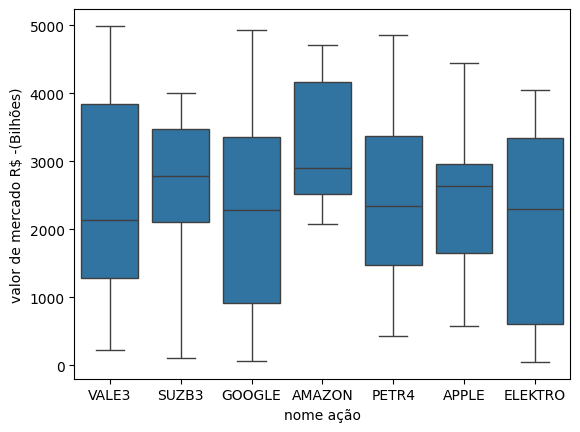

In [224]:
sns.boxplot(y='valor de mercado R$ -(Bilhões)',x='nome ação',data=dados)

In [225]:
dados.info()#verificando se tem numeros invalidos ou nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [226]:
dados.describe()

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
count,100.000000,100.000000,100.00000
mean,136.140000,52.010000,2433.70000
std,75.237942,27.475791,1397.29373
min,15.000000,2.000000,52.00000
25%,67.000000,28.250000,1189.25000
50%,121.500000,55.500000,2433.00000
75%,209.000000,76.500000,3616.50000
max,253.000000,97.000000,4993.00000


In [227]:
dados.info()# verificando se tem dados invalido
#Renomeando o nome da coluna
colunas={'nome ação':'Simbolo'}
dados.rename(columns=colunas,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   nome ação                       100 non-null    object
 1   preço ação R$                   100 non-null    int64 
 2   qtde cotas                      100 non-null    int64 
 3   valor de mercado R$ -(Bilhões)  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [228]:
#teste para ver se funcionou o renomeio das colunas
dados.head()

,Simbolo,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões)
0,VALE3,194,45,2134
1,SUZB3,91,71,3069
2,SUZB3,165,41,2815
3,SUZB3,56,34,3613
4,GOOGLE,212,9,2975


In [229]:
#transformando o nome da ação em string ao inves de object
dados['Simbolo'] = dados['Simbolo'].astype(str)

In [230]:
dados_n = pd.get_dummies(dados,columns=['Simbolo'],drop_first=True)

In [241]:
#Aplicando o KMeans
kmeans = KMeans(n_clusters=8)
kmeans.fit(dados_n)

KMeans()

In [242]:
#Verificando a qualidade da inertia 
sse = kmeans.inertia_
print('SSE',sse)

SSE 3041796.338217338


In [243]:
# Visualizando os agrupamentos
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [234]:
dados_n

,preço ação R$,qtde cotas,valor de mercado R$ -(Bilhões),Simbolo_APPLE,Simbolo_ELEKTRO,Simbolo_GOOGLE,Simbolo_PETR4,Simbolo_SUZB3,Simbolo_VALE3
0,194,45,2134,False,False,False,False,False,True
1,91,71,3069,False,False,False,False,True,False
2,165,41,2815,False,False,False,False,True,False
3,56,34,3613,False,False,False,False,True,False
4,212,9,2975,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
95,208,78,3035,False,False,False,False,True,False
96,253,60,3263,False,False,False,False,False,True
97,99,35,980,False,False,True,False,False,False
98,82,43,1866,False,False,False,False,False,True


Text(0, 0.5, 'Preço das ações')

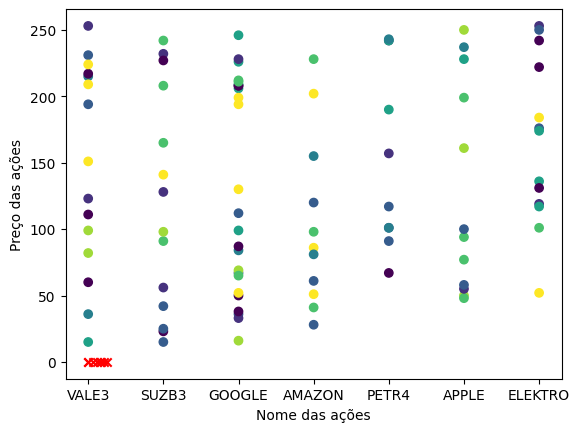

In [244]:
plt.scatter(dados['Simbolo'],dados['preço ação R$'],c=labels)
plt.scatter(centroids[:,4],centroids[:,4],marker='x',color='red')
plt.xlabel('Nome das ações')
plt.ylabel('Preço das ações')

In [251]:
df = pd.DataFrame(dados)

# Selecionar as colunas relevantes para o agrupamento
X = df[['preço ação R$', 'qtde cotas', 'valor de mercado R$ -(Bilhões)']]

In [259]:
from sklearn.metrics import silhouette_score

In [260]:
def avaliacao(dados_ativos):
    inercia = []
    silhueta = []

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_n)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados_ativos, kmeans.predict(dados_n))))
        
    return silhueta, inercia

In [261]:
silhueta, inercia = avaliacao(dados_n)
silhueta

['k=2 - 0.5603594246539042',
 'k=3 - 0.6223500888313387',
 'k=4 - 0.5271387677297121']

In [269]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(3,23),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (23,) and (3,)

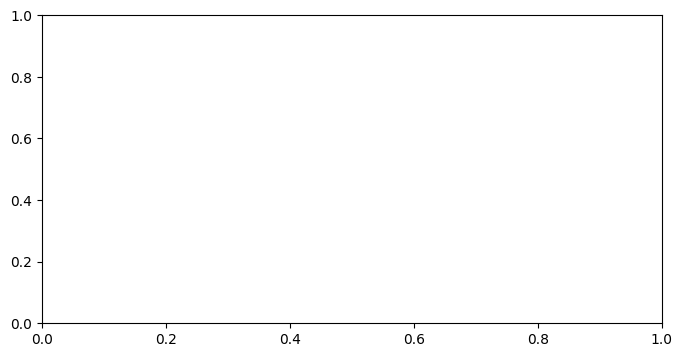

In [267]:
plot_cotovelo(inercia)